<a href="https://colab.research.google.com/github/rjnakano/manejo-inventarios-pdg/blob/main/Notebooks/TDG042521V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
pip install --upgrade kmodes

Requirement already up-to-date: kmodes in /usr/local/lib/python3.7/dist-packages (0.11.0)


In [35]:
# from google.colab import drive
import pathlib
import pandas as pd
import numpy as np
from pylab import *

from sklearn.preprocessing import StandardScaler

from kmodes.kprototypes import KPrototypes

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()

from plotnine import *
import plotnine

In [36]:
plot_kwds = {'alpha' : 0.5, 's' : 1, 'linewidths':0}

In [37]:
if str(pathlib.Path().absolute()).find('content') >= 0:
    sourcepath = 'https://raw.githubusercontent.com/rjnakano/manejo-inventarios-pdg/main/Datos/Transformed'
else:
    sourcepath = '../Datos/Transformed'
print(sourcepath)    

https://raw.githubusercontent.com/rjnakano/manejo-inventarios-pdg/main/Datos/Transformed


In [38]:
# Dataset de inventarios sin dimensiones de los productos
df = pd.read_csv("{}/dfNoDims.csv".format(sourcepath))
df.drop('CONTRPERC', inplace=True, axis=1)
df['AISLE']=df['AISLE'].astype(str)

In [39]:
data1 = df

In [40]:
data1.dtypes

AISLE        object
IG           object
HTS          object
PLANNING     object
ABC          object
UOM          object
CAT          object
COSTX       float64
QTYVAR      float64
dtype: object

In [41]:
data1

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR
0,17,IG56,HTS119,1/1,B,PC,CAT17,-289.8802,-2.63
1,17,IG56,HTS119,1/1,B,PC,CAT17,289.5527,25.00
2,17,IG56,HTS119,1/1,C,PC,CAT17,1111.3121,50.00
3,17,IG56,HTS119,1/1,B,PC,CAT17,-266.8633,-9.09
4,15,IG56,HTS119,1/1,C,PC,CAT17,-517.0436,-11.11
...,...,...,...,...,...,...,...,...,...
16239,23,IG5,HTS67,1/0,C,BX,CAT2,316.3834,1.00
16240,21,IG5,HTS67,1/0,C,BX,CAT2,626.9100,1.00
16241,22,IG5,HTS67,1/0,C,BX,CAT2,4959.6974,136.36
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-1322.5860,-100.00


In [42]:
numdf = data1[list(data1.select_dtypes('float64').columns)]
scaled_features = StandardScaler().fit_transform(numdf.values)
scaled_features_df = pd.DataFrame(scaled_features, index=numdf.index, columns=numdf.columns)
scaled_features_df

,COSTX,QTYVAR
0,-0.029671,-0.037167
1,0.092655,-0.006905
2,0.266138,0.020477
3,-0.024812,-0.044242
4,-0.077628,-0.046455
...,...,...
16239,0.098319,-0.033191
16240,0.163875,-0.033191
16241,1.078580,0.115063
16242,-0.247688,-0.143812


In [43]:
catdf = data1[list(data1.select_dtypes('object').columns)]

In [44]:
data1 = pd.concat((catdf, scaled_features_df), axis = 1)
data1

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR
0,17,IG56,HTS119,1/1,B,PC,CAT17,-0.029671,-0.037167
1,17,IG56,HTS119,1/1,B,PC,CAT17,0.092655,-0.006905
2,17,IG56,HTS119,1/1,C,PC,CAT17,0.266138,0.020477
3,17,IG56,HTS119,1/1,B,PC,CAT17,-0.024812,-0.044242
4,15,IG56,HTS119,1/1,C,PC,CAT17,-0.077628,-0.046455
...,...,...,...,...,...,...,...,...,...
16239,23,IG5,HTS67,1/0,C,BX,CAT2,0.098319,-0.033191
16240,21,IG5,HTS67,1/0,C,BX,CAT2,0.163875,-0.033191
16241,22,IG5,HTS67,1/0,C,BX,CAT2,1.078580,0.115063
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-0.247688,-0.143812


In [45]:
catColumnsPos = [data1.columns.get_loc(col) for col in list(data1.select_dtypes('object').columns)]

In [46]:
# Fit the cluster 
k = 2
gamma = 0.5
import time
start_time = time.time()
kprototype = KPrototypes(n_jobs = -1, n_clusters = k, init = 'Huang', gamma = gamma, random_state = 0)
kprototype.fit_predict(data1, categorical = catColumnsPos)
print("--- %s seconds ---" % (time.time() - start_time))

--- 68.859139919281 seconds ---


In [47]:
print(kprototype.cluster_centroids_)

[['-3.5160872662125153' '-0.11931448944660439' '37' 'IG64' 'HTS15' '1/1'
  'A' 'BX' 'CAT14']
 ['0.11604764967658525' '0.0039379472192550054' '2' 'IG45' 'HTS119' '1/1'
  'A' 'BX' 'CAT17']]


In [48]:
data1['Cluster'] = kprototype.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


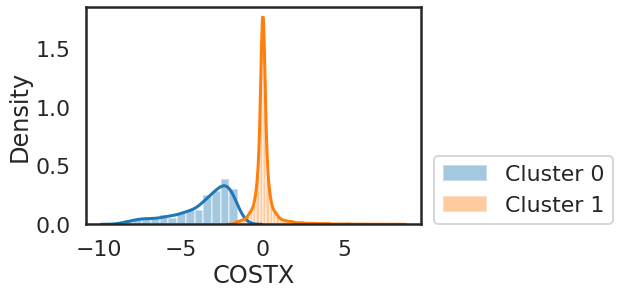

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


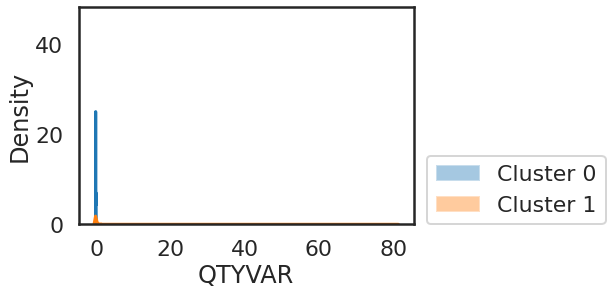

In [49]:
import matplotlib.pylab as plt
for var in ['COSTX','QTYVAR']:
    for i in range(k):
        sns.distplot(data1.loc[data1['Cluster']==i,var], label= 'Cluster {}'.format(i));
        plt.legend(loc=(1.04,0))
    plt.show();
    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


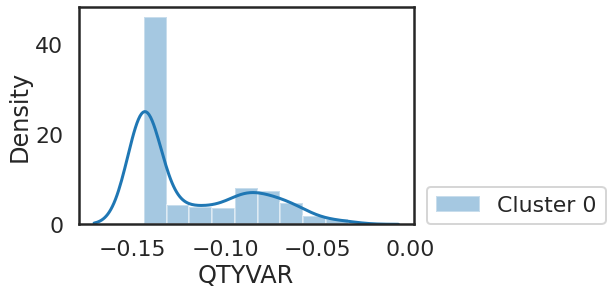

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


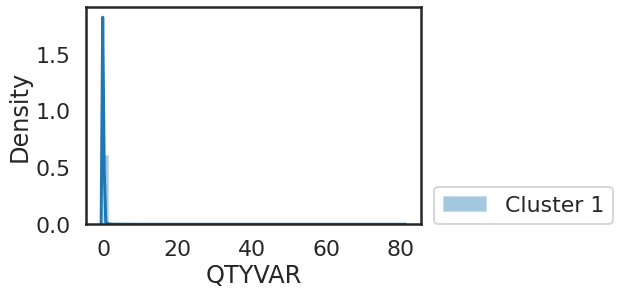

In [50]:
for i in range(k):
    sns.distplot(data1.loc[data1['Cluster']==i,'QTYVAR'], label= 'Cluster {}'.format(i));
    plt.legend(loc=(1.04,0))
    plt.show()

In [51]:
# Dataset original sin estandarizar
df['Cluster'] = kprototype.labels_
for i in range(k):
  print('Cluster',i,'\n');
  print(df[df['Cluster']==i].describe());
  print('\n');

Cluster 0 

              COSTX      QTYVAR  Cluster
count    519.000000  519.000000    519.0
mean  -16804.384576  -77.633295      0.0
std     7884.353514   28.707214      0.0
min   -40013.935000 -100.000000      0.0
25%   -21113.684250 -100.000000      0.0
50%   -14350.339300 -100.000000      0.0
75%   -10729.613450  -50.400000      0.0
max    -7169.298600    1.000000      0.0


Cluster 1 

              COSTX        QTYVAR  Cluster
count  15725.000000  15725.000000  15725.0
mean     400.360598     34.899781      1.0
std     3416.662175    927.770900      0.0
min    -8751.015300   -100.000000      1.0
25%     -610.770100    -49.060000      1.0
50%      -11.940800     -0.470000      1.0
75%      653.507700      5.410000      1.0
max    39709.661400  73950.000000      1.0




In [52]:
pd.set_option('display.max_columns', None)
for i in range(k):
  print('\033[1m' + '\033[91m' + 'Cluster ',i, '\033[0m' + '\n')
  contingency = pd.crosstab(data1[data1['Cluster']==i].Cluster, data1[data1['Cluster']==i].CAT) 
  print(contingency,'\n')
pd.options.display.max_columns = 10

Cluster  0 

CAT      CAT1  CAT10  CAT12  CAT14  CAT15  CAT16  CAT17  CAT2  CAT3  CAT4  \
Cluster                                                                     
0           6      6    112    196      1     41     34     2    17     7   

CAT      CAT5  CAT7  CAT8  
Cluster                    
0          12    28    57   

Cluster  1 

CAT      CAT1  CAT10  CAT11  CAT12  CAT14  CAT15  CAT16  CAT17  CAT2  CAT3  \
Cluster                                                                      
1         140    245      1   2446   1943     82   2414   3954   188   502   

CAT      CAT4  CAT5  CAT6  CAT7  CAT8  CAT9  
Cluster                                      
1          97   188     7  1194  2164   160   



In [53]:
data1.drop('Cluster', inplace=True, axis=1)

In [54]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16244 entries, 0 to 16243
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AISLE     16244 non-null  object 
 1   IG        16244 non-null  object 
 2   HTS       16244 non-null  object 
 3   PLANNING  16244 non-null  object 
 4   ABC       16244 non-null  object 
 5   UOM       16244 non-null  object 
 6   CAT       16244 non-null  object 
 7   COSTX     16244 non-null  float64
 8   QTYVAR    16244 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.1+ MB


In [55]:
# Fit the cluster 
k = 3
gamma = 0.5
import time
start_time = time.time()
kprototype = KPrototypes(n_jobs = -1, n_clusters = k, init = 'Huang', gamma = gamma, random_state = 0)
kprototype.fit_predict(data1, categorical = catColumnsPos)
print("--- %s seconds ---" % (time.time() - start_time))

--- 68.40820693969727 seconds ---


In [56]:
print(kprototype.cluster_centroids_)

[['1.7843575130659042' '36.71708298870506' '2' 'IG38' 'HTS61' '1/1' 'A'
  'SQFT' 'CAT8']
 ['-0.11813272913054793' '-0.04057300520200703' '2' 'IG45' 'HTS119' '1/1'
  'A' 'BX' 'CAT17']
 ['2.601478885239524' '0.48086506415531677' '37' 'IG64' 'HTS15' '1/1' 'A'
  'BX' 'CAT14']]


In [57]:
data1['Cluster'] = kprototype.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

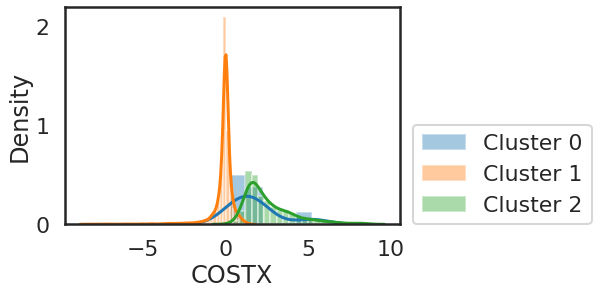

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

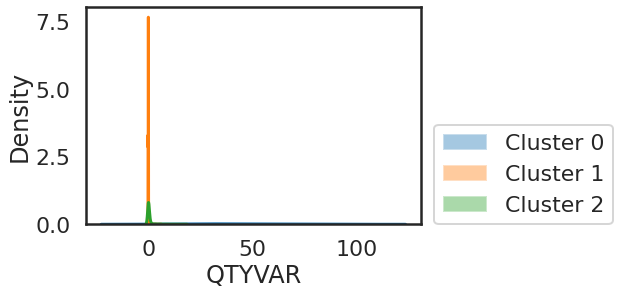

In [58]:
import matplotlib.pylab as plt
for var in ['COSTX','QTYVAR']:
    for i in range(k):
        sns.distplot(data1.loc[data1['Cluster']==i,var], label= 'Cluster {}'.format(i));
        plt.legend(loc=(1.04,0))
    plt.show();
    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


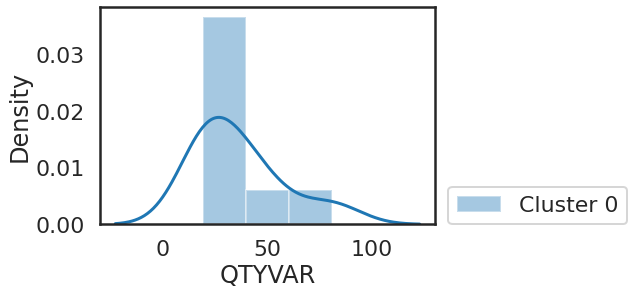

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


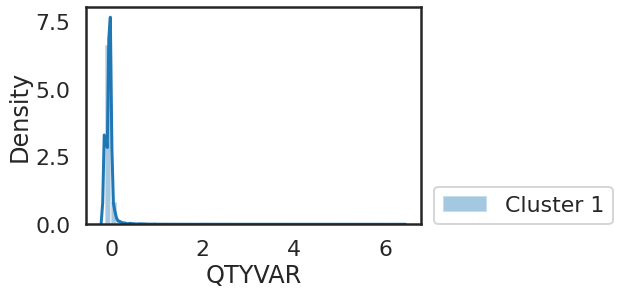

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


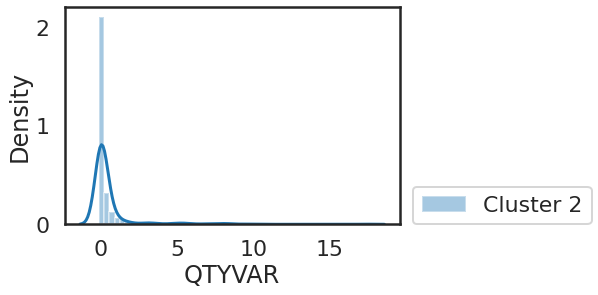

In [59]:
for i in range(k):
    sns.distplot(data1.loc[data1['Cluster']==i,'QTYVAR'], label= 'Cluster {}'.format(i));
    plt.legend(loc=(1.04,0))
    plt.show()

In [60]:
# Dataset original sin estandarizar
df['Cluster'] = kprototype.labels_
for i in range(k):
  print('Cluster',i,'\n');
  print(df[df['Cluster']==i].describe());
  print('\n');

Cluster 0 

              COSTX        QTYVAR  Cluster
count      8.000000      8.000000      8.0
mean    8302.833038  33555.073750      0.0
std     7294.693408  19465.108337      0.0
min     1151.114100  17900.000000      0.0
25%     4371.767625  19452.942500      0.0
50%     6802.826900  27550.000000      0.0
75%     9213.929625  38165.000000      0.0
max    24682.320000  73950.000000      0.0


Cluster 1 

              COSTX        QTYVAR  Cluster
count  15536.000000  15536.000000  15536.0
mean    -708.908148     -5.740019      1.0
std     3751.764225    164.675997      0.0
min   -40013.935000   -100.000000      1.0
25%     -788.786550    -62.500000      1.0
50%      -61.368350     -2.435000      1.0
75%      429.755300      3.215000      1.0
max     6733.146600   5833.330000      1.0


Cluster 2 

              COSTX        QTYVAR  Cluster
count    700.000000    700.000000    700.0
mean   12173.384465    470.348171      2.0
std     6943.810982   1374.637903      0.0
min     1983.0

In [61]:
# Dataset original sin estandarizar
for i in range(k):
  print('Cluster',i,'\n');
  print(data1[data1['Cluster']==i].describe(include='object'));
  print('\n');

Cluster 0 

       AISLE    IG    HTS PLANNING ABC   UOM   CAT
count      8     8      8        8   8     8     8
unique     5     5      5        1   2     5     4
top        2  IG38  HTS61      1/1   A  SQFT  CAT8
freq       4     4      4        8   6     4     4


Cluster 1 

        AISLE     IG     HTS PLANNING    ABC    UOM    CAT
count   15536  15536   15536    15536  15536  15536  15536
unique     43     65     133        3      3     14     16
top         2   IG45  HTS119      1/1      A     BX  CAT17
freq     1092   1554    3658    12814   6528   5918   3915


Cluster 2 

       AISLE    IG    HTS PLANNING  ABC  UOM    CAT
count    700   700    700      700  700  700    700
unique    41    49     48        3    3   12     13
top       37  IG64  HTS15      1/1    A   BX  CAT14
freq      81   117    165      610  542  434    251




In [62]:
# Dataset original sin estandarizar
for i in range(k):
  print('Cluster',i,'\n');
  print(data1[data1['Cluster']==i].describe(include='object'));
  print('\n');

Cluster 0 

       AISLE    IG    HTS PLANNING ABC   UOM   CAT
count      8     8      8        8   8     8     8
unique     5     5      5        1   2     5     4
top        2  IG38  HTS61      1/1   A  SQFT  CAT8
freq       4     4      4        8   6     4     4


Cluster 1 

        AISLE     IG     HTS PLANNING    ABC    UOM    CAT
count   15536  15536   15536    15536  15536  15536  15536
unique     43     65     133        3      3     14     16
top         2   IG45  HTS119      1/1      A     BX  CAT17
freq     1092   1554    3658    12814   6528   5918   3915


Cluster 2 

       AISLE    IG    HTS PLANNING  ABC  UOM    CAT
count    700   700    700      700  700  700    700
unique    41    49     48        3    3   12     13
top       37  IG64  HTS15      1/1    A   BX  CAT14
freq      81   117    165      610  542  434    251




In [64]:
pd.set_option('display.max_columns', None)
for i in range(k):
  print('\033[1m' + '\033[91m' + 'Cluster ',i, '\033[0m' + '\n')
  contingency = pd.crosstab(data1[data1['Cluster']==i].Cluster, data1[data1['Cluster']==i].CAT) 
  print(contingency,'\n')
pd.options.display.max_columns = 10

Cluster  0 

CAT      CAT12  CAT16  CAT7  CAT8
Cluster                          
0            1      2     1     4 

Cluster  1 

CAT      CAT1  CAT10  CAT11  CAT12  CAT14  CAT15  CAT16  CAT17  CAT2  CAT3  \
Cluster                                                                      
1         139    241      1   2398   1888     83   2386   3915   186   494   

CAT      CAT4  CAT5  CAT6  CAT7  CAT8  CAT9  
Cluster                                      
1         100   186     7  1188  2165   159   

Cluster  2 

CAT      CAT1  CAT10  CAT12  CAT14  CAT16  CAT17  CAT2  CAT3  CAT4  CAT5  \
Cluster                                                                    
2           7     10    159    251     67     73     4    25     4    14   

CAT      CAT7  CAT8  CAT9  
Cluster                    
2          33    52     1   



Cluster 0: variaciones porcentuales extremas

In [67]:
data1.drop('Cluster', inplace=True, axis=1)

In [68]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16244 entries, 0 to 16243
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AISLE     16244 non-null  object 
 1   IG        16244 non-null  object 
 2   HTS       16244 non-null  object 
 3   PLANNING  16244 non-null  object 
 4   ABC       16244 non-null  object 
 5   UOM       16244 non-null  object 
 6   CAT       16244 non-null  object 
 7   COSTX     16244 non-null  float64
 8   QTYVAR    16244 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.1+ MB


In [69]:
# Fit the cluster 
k = 4
gamma = 0.5
import time
start_time = time.time()
kprototype = KPrototypes(n_jobs = -1, n_clusters = k, init = 'Huang', gamma = gamma, random_state = 0)
kprototype.fit_predict(data1, categorical = catColumnsPos)
print("--- %s seconds ---" % (time.time() - start_time))

--- 66.49428701400757 seconds ---


In [70]:
print(kprototype.cluster_centroids_)

[['0.002726388751717142' '-0.03595785577407407' '2' 'IG45' 'HTS119' '1/1'
  'A' 'BX' 'CAT17']
 ['-3.6487292748298596' '-0.11901373330295542' '37' 'IG64' 'HTS15' '1/1'
  'A' 'BX' 'CAT14']
 ['1.784357513065899' '36.717082988705094' '2' 'IG38' 'HTS61' '1/1' 'A'
  'SQFT' 'CAT8']
 ['2.79799290946075' '0.50533898239745' '37' 'IG64' 'HTS15' '1/1' 'A'
  'BX' 'CAT14']]


In [71]:
data1['Cluster'] = kprototype.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

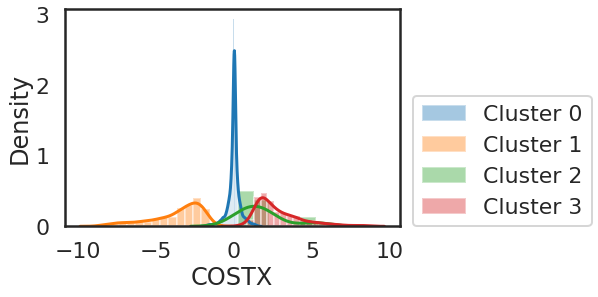

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

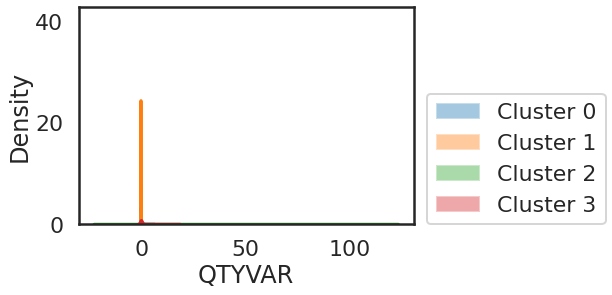

In [72]:
import matplotlib.pylab as plt
for var in ['COSTX','QTYVAR']:
    for i in range(k):
        sns.distplot(data1.loc[data1['Cluster']==i,var], label= 'Cluster {}'.format(i));
        plt.legend(loc=(1.04,0))
    plt.show();
    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


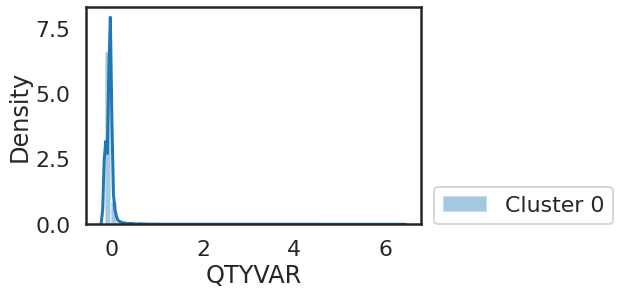

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


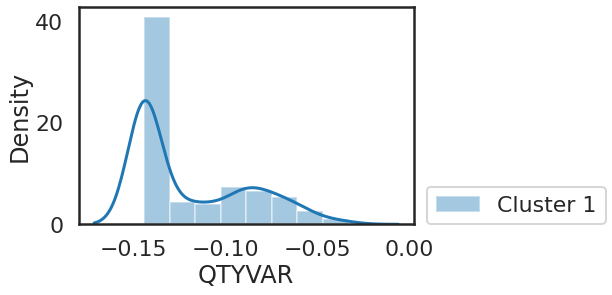

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


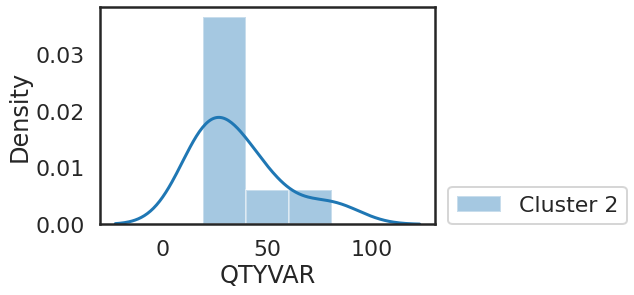

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


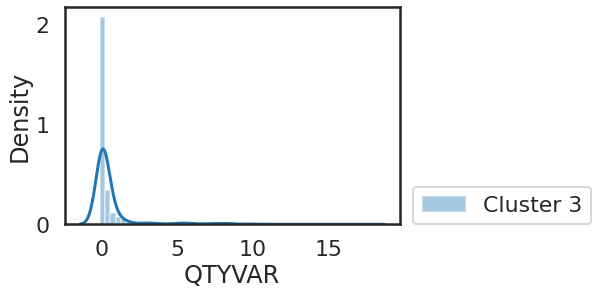

In [73]:
for i in range(k):
    sns.distplot(data1.loc[data1['Cluster']==i,'QTYVAR'], label= 'Cluster {}'.format(i));
    plt.legend(loc=(1.04,0))
    plt.show()

In [74]:
# Dataset original sin estandarizar
df['Cluster'] = kprototype.labels_
for i in range(k):
  print('Cluster',i,'\n');
  print(df[df['Cluster']==i].describe());
  print('\n');

Cluster 0 

              COSTX        QTYVAR  Cluster
count  15143.000000  15143.000000  15143.0
mean    -136.421064     -1.526253      0.0
std     1873.523084    180.069958      0.0
min    -9305.111300   -100.000000      0.0
25%     -665.914650    -50.000000      0.0
50%      -39.719500     -1.410000      0.0
75%      481.841900      3.865000      0.0
max     7351.477700   5833.330000      0.0


Cluster 1 

              COSTX      QTYVAR  Cluster
count    483.000000  483.000000    483.0
mean  -17432.685013  -77.358696      1.0
std     7815.433001   28.603587      0.0
min   -40013.935000 -100.000000      1.0
25%   -21429.082100 -100.000000      1.0
50%   -14976.377400 -100.000000      1.0
75%   -11373.943900  -50.095000      1.0
max    -7519.609900    1.000000      1.0


Cluster 2 

              COSTX        QTYVAR  Cluster
count      8.000000      8.000000      8.0
mean    8302.833038  33555.073750      2.0
std     7294.693408  19465.108337      0.0
min     1151.114100  17900.00000

In [75]:
# Dataset original sin estandarizar
for i in range(k):
  print('Cluster',i,'\n');
  print(data1[data1['Cluster']==i].describe(include='object'));
  print('\n');

Cluster 0 

        AISLE     IG     HTS PLANNING    ABC    UOM    CAT
count   15143  15143   15143    15143  15143  15143  15143
unique     43     65     133        3      3     13     16
top         2   IG45  HTS119      1/1      A     BX  CAT17
freq     1072   1546    3623    12480   6231   5639   3895


Cluster 1 

       AISLE    IG    HTS PLANNING  ABC  UOM    CAT
count    483   483    483      483  483  483    483
unique    42    47     49        3    3   12     13
top       37  IG64  HTS15      1/1    A   BX  CAT14
freq      73    88    125      415  369  331    185


Cluster 2 

       AISLE    IG    HTS PLANNING ABC   UOM   CAT
count      8     8      8        8   8     8     8
unique     5     5      5        1   2     5     4
top        2  IG38  HTS61      1/1   A  SQFT  CAT8
freq       4     4      4        8   6     4     4


Cluster 3 

       AISLE    IG    HTS PLANNING  ABC  UOM    CAT
count    610   610    610      610  610  610    610
unique    41    49     46       

In [76]:
# Dataset original sin estandarizar
for i in range(k):
  print('Cluster',i,'\n');
  print(data1[data1['Cluster']==i].describe(include='object'));
  print('\n');

Cluster 0 

        AISLE     IG     HTS PLANNING    ABC    UOM    CAT
count   15143  15143   15143    15143  15143  15143  15143
unique     43     65     133        3      3     13     16
top         2   IG45  HTS119      1/1      A     BX  CAT17
freq     1072   1546    3623    12480   6231   5639   3895


Cluster 1 

       AISLE    IG    HTS PLANNING  ABC  UOM    CAT
count    483   483    483      483  483  483    483
unique    42    47     49        3    3   12     13
top       37  IG64  HTS15      1/1    A   BX  CAT14
freq      73    88    125      415  369  331    185


Cluster 2 

       AISLE    IG    HTS PLANNING ABC   UOM   CAT
count      8     8      8        8   8     8     8
unique     5     5      5        1   2     5     4
top        2  IG38  HTS61      1/1   A  SQFT  CAT8
freq       4     4      4        8   6     4     4


Cluster 3 

       AISLE    IG    HTS PLANNING  ABC  UOM    CAT
count    610   610    610      610  610  610    610
unique    41    49     46       

In [77]:
pd.set_option('display.max_columns', None)
for i in range(k):
  print('\033[1m' + '\033[91m' + 'Cluster ',i, '\033[0m' + '\n')
  contingency = pd.crosstab(data1[data1['Cluster']==i].Cluster, data1[data1['Cluster']==i].CAT) 
  print(contingency,'\n')
pd.options.display.max_columns = 10

Cluster  0 

CAT      CAT1  CAT10  CAT11  CAT12  CAT14  CAT15  CAT16  CAT17  CAT2  CAT3  \
Cluster                                                                      
0         134    235      1   2319   1729     82   2362   3895   185   479   

CAT      CAT4  CAT5  CAT6  CAT7  CAT8  CAT9  
Cluster                                      
0          94   176     7  1166  2120   159   

Cluster  1 

CAT      CAT1  CAT10  CAT12  CAT14  CAT15  CAT16  CAT17  CAT2  CAT3  CAT4  \
Cluster                                                                     
1           6      6     99    185      1     38     31     2    17     6   

CAT      CAT5  CAT7  CAT8  
Cluster                    
1          12    26    54   

Cluster  2 

CAT      CAT12  CAT16  CAT7  CAT8
Cluster                          
2            1      2     1     4 

Cluster  3 

CAT      CAT1  CAT10  CAT12  CAT14  CAT16  CAT17  CAT2  CAT3  CAT4  CAT5  \
Cluster                                                                    

In [87]:
pd.set_option('display.max_columns', None)
for cluster in [0,1,3]:
  for itemcat in ['CAT12','CAT14']:
    print('\033[1m' + '\033[91m' + 'Cluster ',cluster,' Category: ',itemcat,'\033[0m' + '\n')
    contingency = pd.crosstab(data1[(data1['Cluster']==cluster) & (data1['CAT']==itemcat)].Cluster, data1[data1['Cluster']==cluster].IG) 
    print(contingency,'\n')
pd.options.display.max_columns = 10

Cluster  0  Category:  CAT12 

IG       IG16  IG17  IG20  IG30  IG31  IG33  IG34  IG35  IG40  IG42  IG43
Cluster                                                                  
0         384    95     9   679   430   153    28   525     1    11     4 

Cluster  0  Category:  CAT14 

IG       IG61  IG62  IG63  IG64  IG65  IG67  IG69  IG70  IG71
Cluster                                                      
0         809     1    11   621    18   169    50    18    32 

Cluster  1  Category:  CAT12 

IG       IG16  IG17  IG30  IG31  IG33  IG34  IG35
Cluster                                          
1          20    17    22    22     4     3    11 

Cluster  1  Category:  CAT14 

IG       IG61  IG62  IG63  IG64  IG67  IG69  IG70
Cluster                                          
1          74     1     3    88    10     3     6 

Cluster  3  Category:  CAT12 

IG       IG16  IG17  IG30  IG31  IG33  IG34  IG35
Cluster                                          
3          18    17    34    

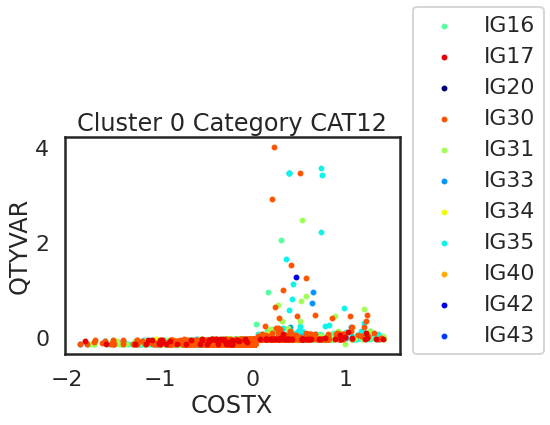

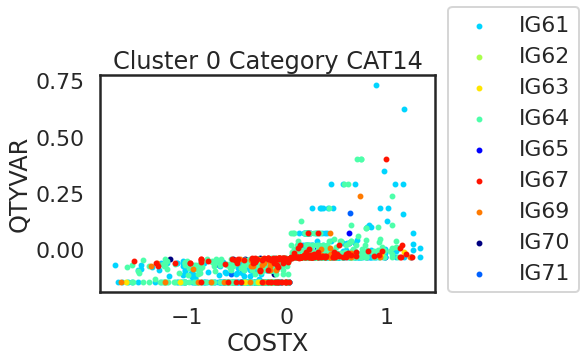

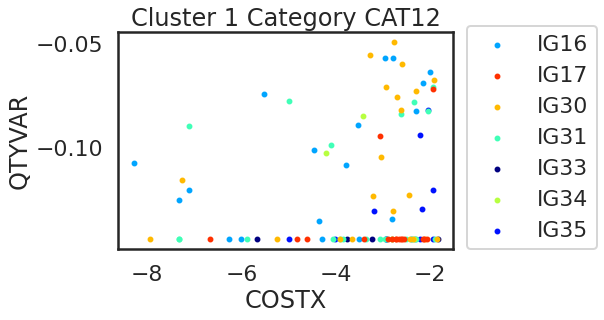

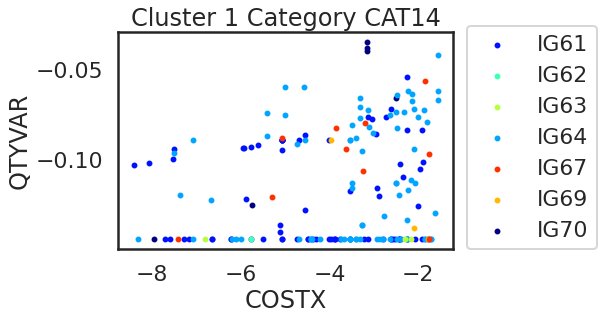

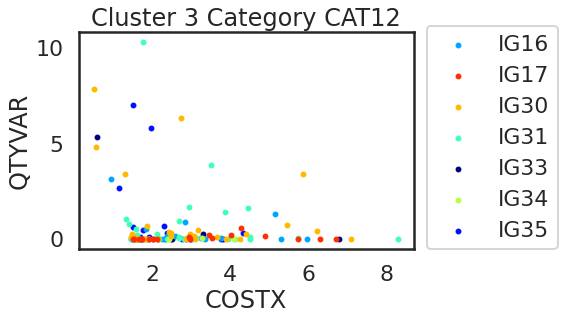

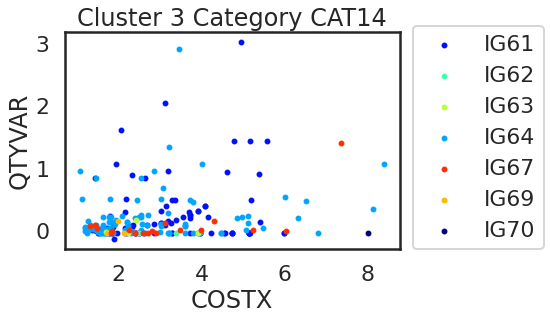

In [103]:
for cluster in [0,1,3]:
  for itemcat in ['CAT12','CAT14']:
    ax=gca()
    plttitle = 'Cluster ' + str(cluster) + ' Category ' + itemcat
    uniq = list(set(data1[(data1['Cluster']==cluster) & (data1['CAT']==itemcat)].IG))
    # Color map
    z = range(1,len(uniq))
    colorMap = plt.get_cmap('jet')
    cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=colorMap)
    # Plot CAT
    for i in range(len(uniq)):
      plt.scatter(data1[(data1['Cluster']==cluster) & (data1['CAT']==itemcat) & ( data1['IG']== uniq[i])].COSTX, data1[(data1['Cluster']==cluster) & (data1['CAT']==itemcat) & ( data1['IG']== uniq[i])].QTYVAR, s=15, color=scalarMap.to_rgba(i), label=uniq[i])
    plt.xlabel('COSTX')
    plt.ylabel('QTYVAR')
    plt.title(plttitle)
    handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels, loc=(1.04,0))
    plt.show()

In [104]:
def add2set (nuevos):
  conjunto = {999999}
  conjunto.update(nuevos)
  conjunto.discard(999999)
  return(conjunto)

In [124]:
set1 = {}
set1=add2set(unique(data1[(data1['Cluster']==1) & (data1['CAT']=='CAT12')].IG))
set3 = {}
set3=add2set(unique(data1[(data1['Cluster']==3) & (data1['CAT']=='CAT12')].IG))

In [120]:
priorIG = set1 | set3
print(priorIG)

{'IG33', 'IG35', 'IG34', 'IG16', 'IG31', 'IG30', 'IG17'}


# Priorizar CAT12 pero solo  IG = IG33, IG35, IG34, IG16, IG31, IG30, IG17

In [ ]:
priorIG = set1 | set3
print(priorIG)

{'IG33', 'IG35', 'IG34', 'IG16', 'IG31', 'IG30', 'IG17'}


In [127]:
set1 = {}
set1=add2set(unique(data1[(data1['Cluster']==1) & (data1['CAT']=='CAT14')].IG))
set3 = {}
set3=add2set(unique(data1[(data1['Cluster']==3) & (data1['CAT']=='CAT14')].IG))

In [128]:
priorIG = set1 | set3
print(priorIG)

{'IG70', 'IG61', 'IG64', 'IG62', 'IG63', 'IG69', 'IG67'}


# Priorizar CAT14 pero solo  IG = IG61, IG62, IG63, IG64, IG67, IG69, IG70

In [133]:
pd.set_option('display.max_columns', None)
for cluster in [1,3]:
  for itemcat in ['CAT12','CAT14']:
    print('\033[1m' + '\033[91m' + 'Cluster ',cluster,' Category: ',itemcat,'\033[0m' + '\n')
    contingency = pd.crosstab(data1[(data1['Cluster']==cluster) & (data1['CAT']==itemcat)].Cluster, data1[data1['Cluster']==cluster].HTS) 
    print(contingency,'\n')
pd.options.display.max_columns = 10

Cluster  1  Category:  CAT12 

HTS      HTS119  HTS15  HTS150  HTS155  HTS16  HTS166  HTS19  HTS36  HTS37  \
Cluster                                                                      
1            10      7       1       1      1       1      1      4      2   

HTS      HTS40  HTS41  HTS43  HTS45  HTS46  HTS51  HTS52  HTS53  HTS55  HTS58  \
Cluster                                                                         
1            6      3      2      1      5      9      1      2     20      2   

HTS      HTS59  HTS94  HTS95  HTS98  
Cluster                              
1            2      2     12      4   

Cluster  1  Category:  CAT14 

HTS      HTS117  HTS120  HTS15  HTS150  HTS161  HTS170  HTS6  HTS76  HTS93  \
Cluster                                                                      
1             7       1     91       3       1       1    74      4      1   

HTS      HTS95  
Cluster         
1            2   

Cluster  3  Category:  CAT12 

HTS      HTS119  HTS15  

#Ignorar HTS

In [134]:
pd.set_option('display.max_columns', None)
for cluster in [1,3]:
  for itemcat in ['CAT12','CAT14']:
    print('\033[1m' + '\033[91m' + 'Cluster ',cluster,' Category: ',itemcat,'\033[0m' + '\n')
    contingency = pd.crosstab(data1[(data1['Cluster']==cluster) & (data1['CAT']==itemcat)].Cluster, data1[data1['Cluster']==cluster].PLANNING) 
    print(contingency,'\n')
pd.options.display.max_columns = 10

Cluster  1  Category:  CAT12 

PLANNING  1/0  1/1  2/0
Cluster                
1          11   86    2 

Cluster  1  Category:  CAT14 

PLANNING  1/1  2/0
Cluster           
1         182    3 

Cluster  3  Category:  CAT12 

PLANNING  1/0  1/1  2/0
Cluster                
3          19  117    3 

Cluster  3  Category:  CAT14 

PLANNING  1/1  2/0
Cluster           
3         223    2 



#Priorizar PLANNING = 1 / 1 como regla del negocio - los resultados lo confirman

In [135]:
pd.set_option('display.max_columns', None)
for cluster in [1,3]:
  for itemcat in ['CAT12','CAT14']:
    print('\033[1m' + '\033[91m' + 'Cluster ',cluster,' Category: ',itemcat,'\033[0m' + '\n')
    contingency = pd.crosstab(data1[(data1['Cluster']==cluster) & (data1['CAT']==itemcat)].Cluster, data1[data1['Cluster']==cluster].ABC) 
    print(contingency,'\n')
pd.options.display.max_columns = 10

Cluster  1  Category:  CAT12 

ABC       A   B   C
Cluster            
1        70  13  16 

Cluster  1  Category:  CAT14 

ABC        A  B  C
Cluster           
1        177  4  4 

Cluster  3  Category:  CAT12 

ABC        A   B   C
Cluster             
3        102  14  23 

Cluster  3  Category:  CAT14 

ABC        A  B  C
Cluster           
3        215  5  5 



#Priorizar ABC = A como regla del negocio - los resultados lo confirman

In [136]:
pd.set_option('display.max_columns', None)
for cluster in [1,3]:
  for itemcat in ['CAT12','CAT14']:
    print('\033[1m' + '\033[91m' + 'Cluster ',cluster,' Category: ',itemcat,'\033[0m' + '\n')
    contingency = pd.crosstab(data1[(data1['Cluster']==cluster) & (data1['CAT']==itemcat)].Cluster, data1[data1['Cluster']==cluster].UOM) 
    print(contingency,'\n')
pd.options.display.max_columns = 10

Cluster  1  Category:  CAT12 

UOM      BDL  BG  BX  RL  YD
Cluster                     
1          2   4  33   1  59 

Cluster  1  Category:  CAT14 

UOM      BDL   BX
Cluster          
1          2  183 

Cluster  3  Category:  CAT12 

UOM      BDL  BG  BX  RL   YD
Cluster                      
3          3   2  31   2  101 

Cluster  3  Category:  CAT14 

UOM      BDL   BX
Cluster          
3          2  223 



#No excluir ninguna unidad (UOM) de la priorización por CAT y IG más PLANNING y ABC según reglas del negocio pero prestar especial atención a items inventariados en YD dentro de la categoría CAT12 y BX dentro de la categoría CAT14.

In [137]:
pd.set_option('display.max_columns', None)
for cluster in [1,3]:
  for itemcat in ['CAT12','CAT14']:
    print('\033[1m' + '\033[91m' + 'Cluster ',cluster,' Category: ',itemcat,'\033[0m' + '\n')
    contingency = pd.crosstab(data1[(data1['Cluster']==cluster) & (data1['CAT']==itemcat)].Cluster, data1[data1['Cluster']==cluster].AISLE) 
    print(contingency,'\n')
pd.options.display.max_columns = 10

Cluster  1  Category:  CAT12 

AISLE    10  11   2  21  23  24  25  26  27  28   3  34   4  5  6  7  8  9  99
Cluster                                                                       
1         2   2  11   2   1   3   4   2   3   1  13   2  26  1  1  4  5  9   7 

Cluster  1  Category:  CAT14 

AISLE    10  11  28  29  30  31  32  33  37  4  5  8  9  99
Cluster                                                    
1         3  28   8   8   7  11  34   8  70  1  1  2  2   2 

Cluster  3  Category:  CAT12 

AISLE    10   2  21  24  25  26  27  28   3  34  35   4  5  6  7  8  9  99
Cluster                                                                   
3         3  13   2   1   3   3   1   1  34   5   1  40  1  7  5  5  7   7 

Cluster  3  Category:  CAT14 

AISLE    0  10  11  19  26  28  29  30  31  32  33  35  37  8  99
Cluster                                                          
3        2   8  46   1   1  11  14  11   9  38  12   2  67  2   1 



#Sería interesante prestar atención a los pasillos 11, 32, y 37 en el caso de CAT14, y 3 y 4 en el caso de CAT12.

##En resumen, se recomienda priorizar:


*   CAT12:
 *   IG = IG33, IG35, IG34, IG16, IG31, IG30, IG17
 *   De segundo orden: UOM = BX y AISLE = 3 y 4
*   CAT14:
 *   IG = IG61, IG62, IG63, IG64, IG67, IG69, IG70
 *   De segundo orden: UOM = YD y AISLE = 11, 32, 37

*   PLANNING 1/1 y código ABC = A según reglas del negocio y confirmado por los resultados.


In [141]:
# Revisar datos anomalos
df[(df['QTYVAR']<0) & (df['COSTX']>0)]

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,Cluster
2121,33,IG61,HTS6,1/1,A,BX,CAT14,8774.1300,-100.0,3
13773,5,IG31,HTS55,1/1,A,YD,CAT12,4555.3851,-100.0,0


In [157]:
df[(df['COSTX']>=4555.3851) & (df['COSTX']<=8774.13)].describe()

,COSTX,QTYVAR,Cluster
count,448.000000,448.000000,448.000000
mean,6404.005077,539.910379,1.375000
std,1223.186879,3828.759778,1.493461
min,4555.385100,-100.000000,0.000000
25%,5344.735500,1.000000,0.000000
50%,6180.325600,39.210000,0.000000
75%,7408.722200,123.327500,3.000000
max,8774.130000,73950.000000,3.000000


In [165]:
df[df['Cluster']==3].describe()

,COSTX,QTYVAR,Cluster
count,610.000000,610.000000,610.0
mean,13104.234719,492.693574,3.0
std,6960.599771,1435.604623,0.0
min,1983.003300,-100.000000,3.0
25%,8089.460500,1.000000,3.0
50%,10899.556150,64.760000,3.0
75%,16555.187650,250.000000,3.0
max,39709.661400,15900.000000,3.0


In [163]:
df[(df['Cluster']==3) & (df['COSTX']!=8774.13)].describe()

,COSTX,QTYVAR,Cluster
count,609.000000,609.000000,609.0
mean,13111.344908,493.666798,3.0
std,6964.104210,1436.583325,0.0
min,1983.003300,1.000000,3.0
25%,8088.189400,1.000000,3.0
50%,10907.439500,65.000000,3.0
75%,16572.274600,250.000000,3.0
max,39709.661400,15900.000000,3.0


In [161]:
df[(df['Cluster']==0) & (df['QTYVAR']<0) & (df['COSTX']!=4555.3851)].describe()

,COSTX,QTYVAR,Cluster
count,8043.000000,8043.000000,8043.0
mean,-1217.756205,-52.478661,0.0
std,1592.711519,42.591936,0.0
min,-9148.286500,-100.000000,0.0
25%,-1577.964450,-100.000000,0.0
50%,-591.229800,-43.320000,0.0
75%,-177.338550,-8.570000,0.0
max,-0.061900,-0.010000,0.0


In [164]:
# Revisar datos anomalos
df[(df['QTYVAR']>0) & (df['COSTX']<0)]

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,Cluster
14860,20,IG45,HTS24,1/1,A,PC,CAT17,-175.2727,1.0,0
15602,18,IG45,HTS24,1/0,C,PC,CAT17,-9305.1113,1.0,0
15644,1,IG2,HTS97,1/1,C,BX,CAT1,-25795.0287,1.0,1


In [166]:
df[df['Cluster']==1].describe()

,COSTX,QTYVAR,Cluster
count,483.000000,483.000000,483.0
mean,-17432.685013,-77.358696,1.0
std,7815.433001,28.603587,0.0
min,-40013.935000,-100.000000,1.0
25%,-21429.082100,-100.000000,1.0
50%,-14976.377400,-100.000000,1.0
75%,-11373.943900,-50.095000,1.0
max,-7519.609900,1.000000,1.0


In [167]:
df[(df['Cluster']==1) & (df['COSTX']!=-25795.0287)].describe()

,COSTX,QTYVAR,Cluster
count,482.000000,482.000000,482.0
mean,-17415.335753,-77.521266,1.0
std,7814.236801,28.409056,0.0
min,-40013.935000,-100.000000,1.0
25%,-21408.264800,-100.000000,1.0
50%,-14972.756600,-100.000000,1.0
75%,-11359.570550,-50.295000,1.0
max,-7519.609900,-0.420000,1.0
